In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import csv

In [15]:
sp_2024 = pd.read_csv("./data/Most Streamed Spotify Songs 2024.csv", encoding='latin1')
data_cleaned = pd.read_csv("./cleaned_data_ke.csv", encoding='latin1')

In [16]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   4598 non-null   object 
 1   Album Name              4598 non-null   object 
 2   Artist                  4593 non-null   object 
 3   Release Date            4598 non-null   object 
 4   ISRC                    4598 non-null   object 
 5   All Time Rank           4598 non-null   object 
 6   Track Score             4598 non-null   int64  
 7   Spotify Streams         4598 non-null   int64  
 8   Spotify Playlist Count  4598 non-null   int64  
 9   Spotify Playlist Reach  4598 non-null   int64  
 10  Spotify Popularity      3794 non-null   float64
 11  YouTube Views           4598 non-null   int64  
 12  YouTube Likes           4598 non-null   int64  
 13  TikTok Posts            4598 non-null   int64  
 14  TikTok Likes            4598 non-null   

In [17]:
data_cleaned.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725,390470936,0,0,92.0,0,0,0,0,0,0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545,323703884,0,0,92.0,0,0,0,0,0,0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538,601309283,0,0,92.0,0,0,0,0,0,0,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444,2031280633,0,0,85.0,0,0,0,0,0,0,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423,107034922,0,0,88.0,0,0,0,0,0,0,1


In [18]:
data_cleaned[['Spotify Streams', 'YouTube Likes', 'TikTok Likes']].corr()

,Spotify Streams,YouTube Likes,TikTok Likes
Spotify Streams,1.000000,-0.034261,-0.030609
YouTube Likes,-0.034261,1.000000,-0.003287
TikTok Likes,-0.030609,-0.003287,1.000000


In [19]:
data_cleaned.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Explicit Track'],
      dtype='object')

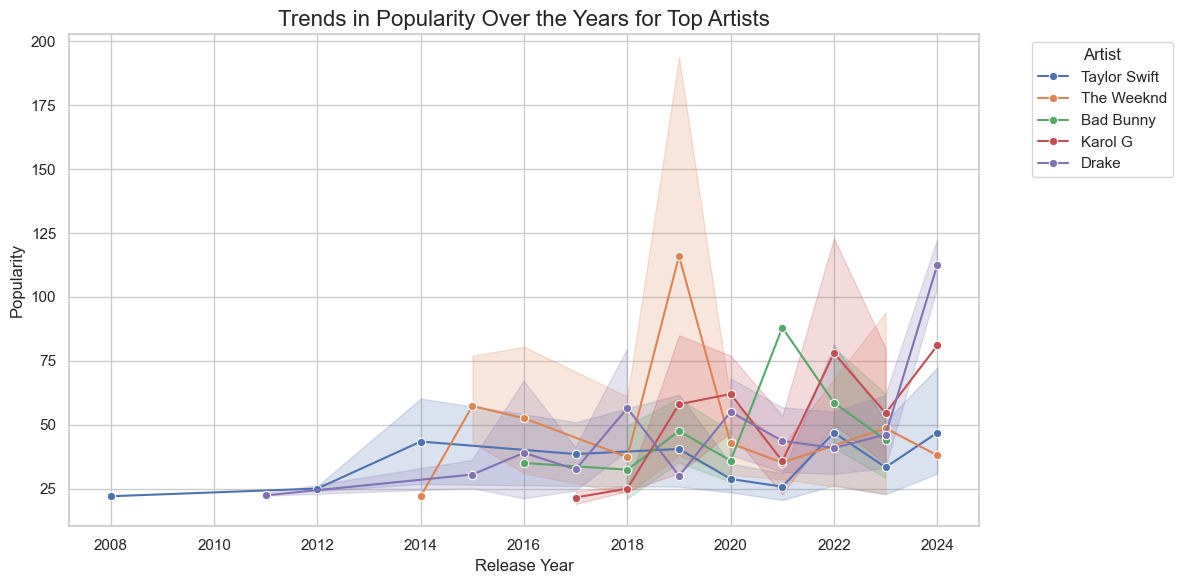

C:\Users\Karina\AppData\Local\Temp\ipykernel_33160\3603470647.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_artist_data, x='Artist', y='Track Score', palette='muted')


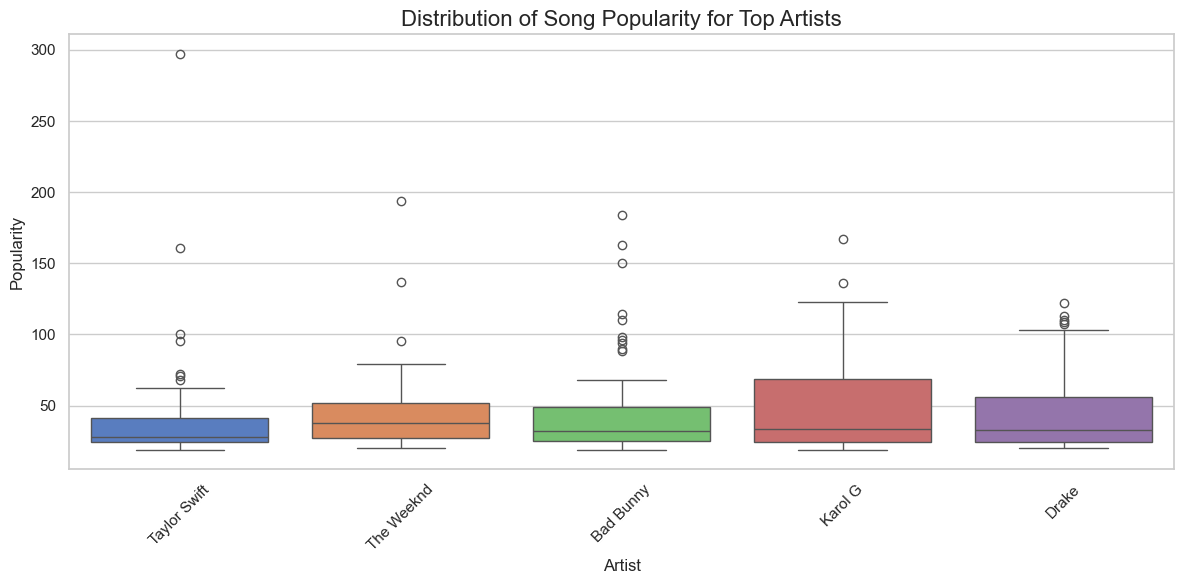

C:\Users\Karina\AppData\Local\Temp\ipykernel_33160\3603470647.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')


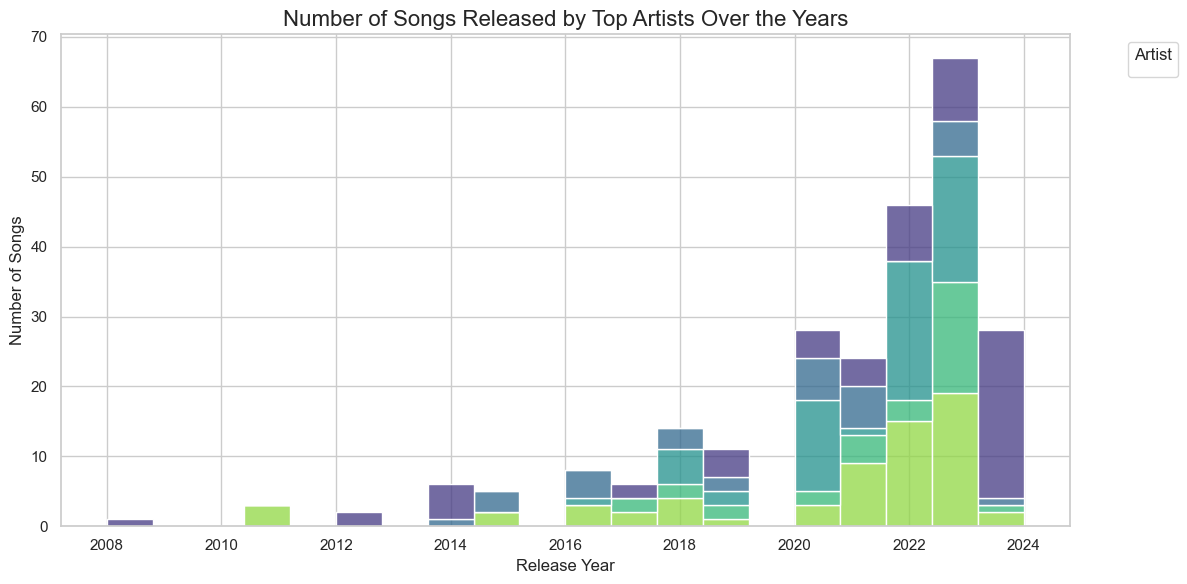

In [20]:
data_cleaned['Release Date'] = pd.to_datetime(data_cleaned['Release Date'])

# Extract the year from the release_date for trend analysis
data_cleaned['Release Year'] = data_cleaned['Release Date'].dt.year

# Select top 5 artists by the number of songs in the dataset
top_artists = data_cleaned['Artist'].value_counts().head(5).index
top_artist_data = data_cleaned[data_cleaned['Artist'].isin(top_artists)]

# Set the Seaborn theme for better visualization
sns.set_theme(style="whitegrid")

# Plot 1: Trends in popularity over the years for top artists
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_artist_data, x='Release Year', y='Track Score', hue='Artist', marker="o")
plt.title('Trends in Popularity Over the Years for Top Artists', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Distribution of popularity for the top artists
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_artist_data, x='Artist', y='Track Score', palette='muted')
plt.title('Distribution of Song Popularity for Top Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Number of songs released by top artists over the years
plt.figure(figsize=(12, 6))
sns.histplot(data=top_artist_data, x='Release Year', hue='Artist', multiple='stack', bins=20, palette='viridis')
plt.title('Number of Songs Released by Top Artists Over the Years', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
data_cleaned.shape

(4598, 19)

In [22]:
data_cleaned = sp_2024.dropna(subset=['Artist'])

In [23]:
data_cleaned[data_cleaned['TikTok Likes'] == 0]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track


In [24]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4595 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4595 non-null   object 
 1   Album Name                  4595 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4595 non-null   object 
 4   ISRC                        4595 non-null   object 
 5   All Time Rank               4595 non-null   object 
 6   Track Score                 4595 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 non-n

In [25]:
columns_to_convert = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'YouTube Views', 'YouTube Likes', 'YouTube Playlist Reach',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views','All Time Rank'
]

# Convert the specified columns to integer type
data_cleaned[columns_to_convert] = data_cleaned[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

print(data_cleaned.dtypes)

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                   int64
Track Score                   float64
Spotify Streams                 int64
Spotify Playlist Count          int64
Spotify Playlist Reach          int64
Spotify Popularity            float64
YouTube Views                   int64
YouTube Likes                   int64
TikTok Posts                    int64
TikTok Likes                    int64
TikTok Views                    int64
YouTube Playlist Reach          int64
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

C:\Users\Karina\AppData\Local\Temp\ipykernel_33160\594722977.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[columns_to_convert] = data_cleaned[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)


In [26]:
data_cleaned.shape

(4595, 29)

In [27]:
# Check NaN values in each column.
for column in data_cleaned.columns:
    print(column, data_cleaned[column].isnull().sum())

Track 0
Album Name 0
Artist 0
Release Date 0
ISRC 0
All Time Rank 0
Track Score 0
Spotify Streams 0
Spotify Playlist Count 0
Spotify Playlist Reach 0
Spotify Popularity 799
YouTube Views 0
YouTube Likes 0
TikTok Posts 0
TikTok Likes 0
TikTok Views 0
YouTube Playlist Reach 0
Apple Music Playlist Count 556
AirPlay Spins 493
SiriusXM Spins 2118
Deezer Playlist Count 916
Deezer Playlist Reach 923
Amazon Playlist Count 1050
Pandora Streams 1101
Pandora Track Stations 1263
Soundcloud Streams 3328
Shazam Counts 576
TIDAL Popularity 4595
Explicit Track 0


In [28]:
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned.shape

(4593, 29)

In [29]:
data_cleaned = data_cleaned[~data_cleaned['Artist'].str.contains('½', na = False)]
data_cleaned = data_cleaned[~data_cleaned['Artist'].str.contains('ý', na = False)]
data_cleaned = data_cleaned[~data_cleaned['Artist'].str.contains('ï¿', na = False)]
print(data_cleaned)

                                                  Track  \
0                                   MILLION DOLLAR BABY   
1                                           Not Like Us   
2                            i like the way you kiss me   
3                                               Flowers   
4                                               Houdini   
...                                                 ...   
4594  ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...   
4595                                  For the Last Time   
4596                                   Dil Meri Na Sune   
4597                              Grace (feat. 42 Dugg)   
4598                                Nashe Si Chadh Gayi   

                                             Album Name          Artist  \
0                          Million Dollar Baby - Single   Tommy Richman   
1                                           Not Like Us  Kendrick Lamar   
2                            I like the way you kiss me         Ar

In [30]:
data_cleaned.shape

(4425, 29)

In [31]:
data_cleaned = data_cleaned.dropna(subset=['Spotify Streams'])

In [32]:
data_cleaned = data_cleaned.dropna(subset=['TikTok Likes'])

In [33]:
data_cleaned = data_cleaned.dropna(subset=['Spotify Popularity'])

In [34]:
data_cleaned = data_cleaned.dropna(subset=['YouTube Likes'])

In [35]:
data_cleaned.shape

(3660, 29)

In [36]:
df = pd.DataFrame(data_cleaned)
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d/%m/%Y')

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a new column for season
#Individual seasons can be retrieved 
# from the dataset by calling the get_season() function, which returns an instance of a Season object.
df['Season'] = df['Release Date'].dt.month.map(get_season)

# Display the DataFrame
print(df)

# Example Visualization: Average popularity by season
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Season', y='Track Score', palette='viridis', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Average Popularity by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.tight_layout()
plt.show()

ValueError: time data "4/26/2024" doesn't match format "%d/%m/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [37]:
data_cleaned[['Spotify Streams', 'YouTube Likes', 'TikTok Likes']].corr()

,Spotify Streams,YouTube Likes,TikTok Likes
Spotify Streams,NaN,NaN,NaN
YouTube Likes,NaN,1.000000,-0.002188
TikTok Likes,NaN,-0.002188,1.000000


C:\Users\Karina\AppData\Local\Temp\ipykernel_33160\784928844.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(youtube_views, youtube_likes)


Pearson correlation coefficient: nan


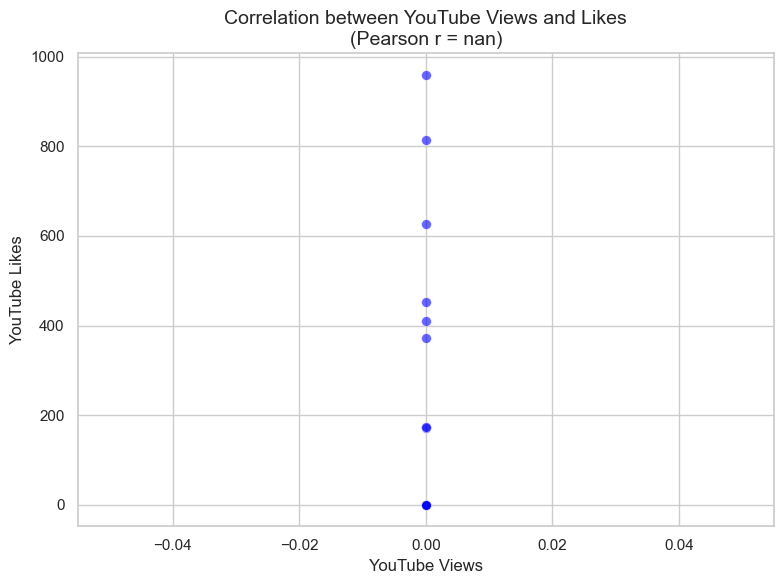

In [38]:
from scipy.stats import pearsonr

# Filter the data to include only relevant columns
youtube_views = data_cleaned['YouTube Views']
youtube_likes = data_cleaned['YouTube Likes']

# Calculate correlation coefficient
correlation, _ = pearsonr(youtube_views, youtube_likes)
print(f"Pearson correlation coefficient: {correlation:.2f}")

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=youtube_views, y=youtube_likes, alpha=0.6, color='blue', s=50)
sns.regplot(x=youtube_views, y=youtube_likes, scatter=False, color='red', line_kws={"linewidth": 1.5})

# Add labels and title
plt.title(f'Correlation between YouTube Views and Likes\n(Pearson r = {correlation:.2f})', fontsize=14)
plt.xlabel('YouTube Views', fontsize=12)
plt.ylabel('YouTube Likes', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

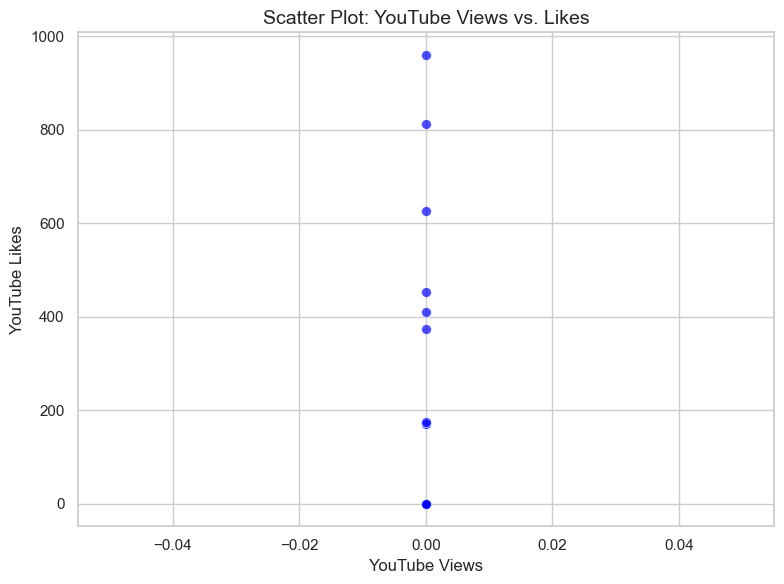

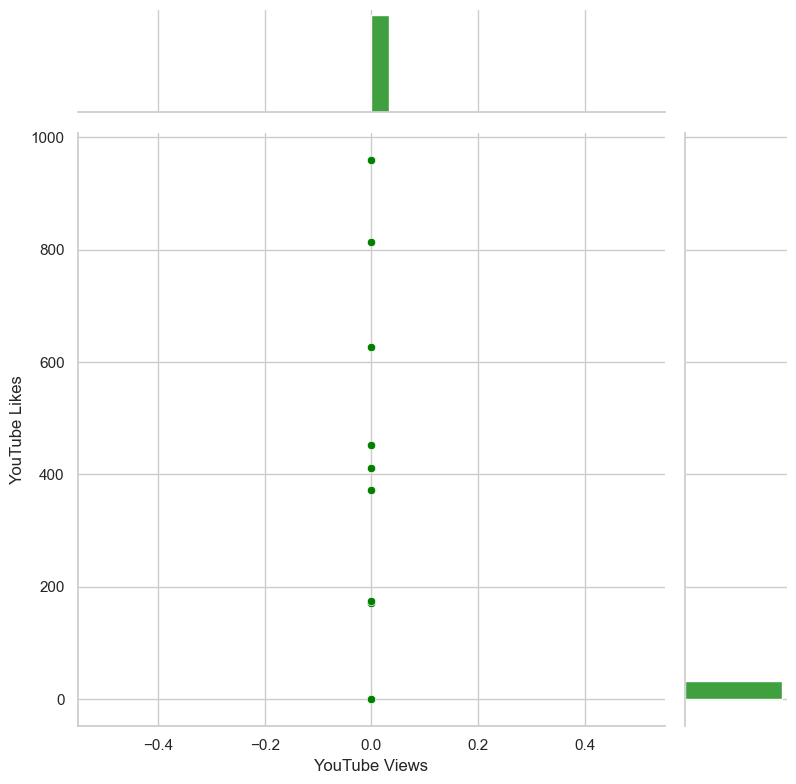

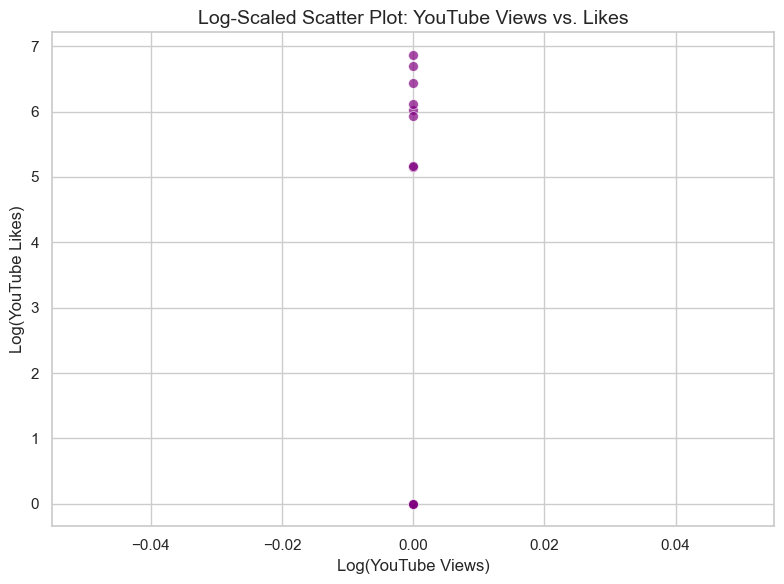

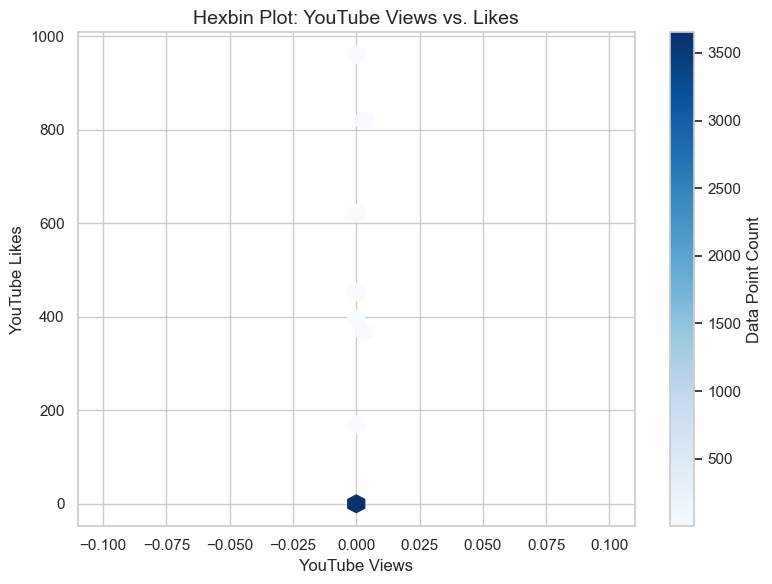

In [39]:
# Filter necessary columns
youtube_views = data_cleaned['YouTube Views']
youtube_likes = data_cleaned['YouTube Likes']

# ---- Option 1: Scatter Plot with Regression Line ----
plt.figure(figsize=(8, 6))
sns.scatterplot(x=youtube_views, y=youtube_likes, alpha=0.7, color='blue', s=50)
sns.regplot(x=youtube_views, y=youtube_likes, scatter=False, color='red', line_kws={"linewidth": 1.5})
plt.title('Scatter Plot: YouTube Views vs. Likes', fontsize=14)
plt.xlabel('YouTube Views', fontsize=12)
plt.ylabel('YouTube Likes', fontsize=12)
plt.tight_layout()
plt.show()

# ---- Option 2: Jointplot ----
sns.jointplot(
    x='YouTube Views',
    y='YouTube Likes',
    data=data_cleaned,
    kind='scatter',
    marginal_kws={'bins': 30, 'fill': True},
    color='green',
    height=8
)
plt.show()

# ---- Option 3: Log-Scaled Scatter Plot ----
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.log1p(youtube_views), y=np.log1p(youtube_likes), alpha=0.7, color='purple', s=50)
sns.regplot(x=np.log1p(youtube_views), y=np.log1p(youtube_likes), scatter=False, color='orange', line_kws={"linewidth": 1.5})
plt.title('Log-Scaled Scatter Plot: YouTube Views vs. Likes', fontsize=14)
plt.xlabel('Log(YouTube Views)', fontsize=12)
plt.ylabel('Log(YouTube Likes)', fontsize=12)
plt.tight_layout()
plt.show()

# ---- Option 4: Hexbin Plot ----
plt.figure(figsize=(8, 6))
plt.hexbin(youtube_views, youtube_likes, gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Data Point Count')
plt.title('Hexbin Plot: YouTube Views vs. Likes', fontsize=14)
plt.xlabel('YouTube Views', fontsize=12)
plt.ylabel('YouTube Likes', fontsize=12)
plt.tight_layout()
plt.show()

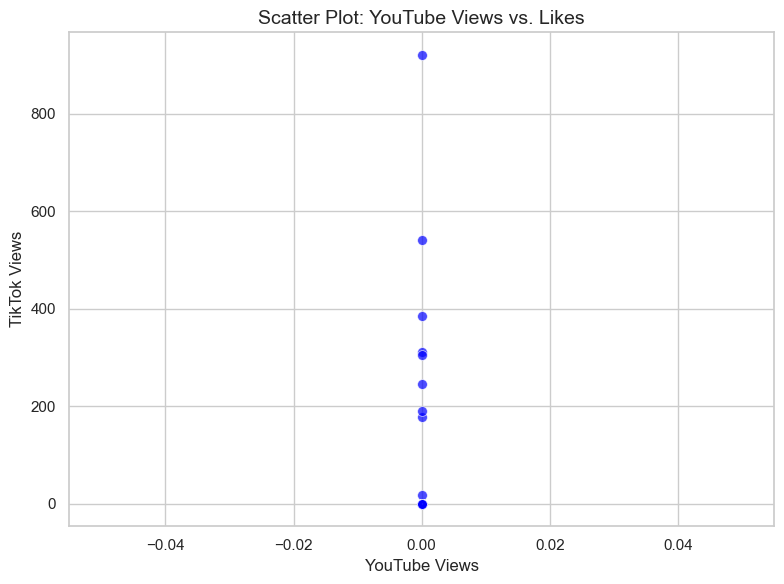

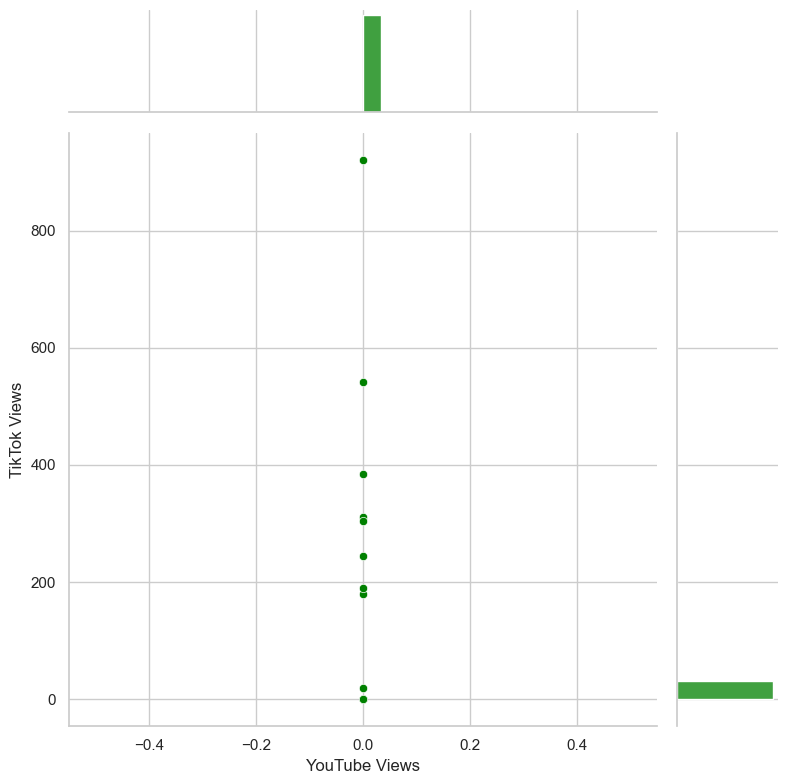

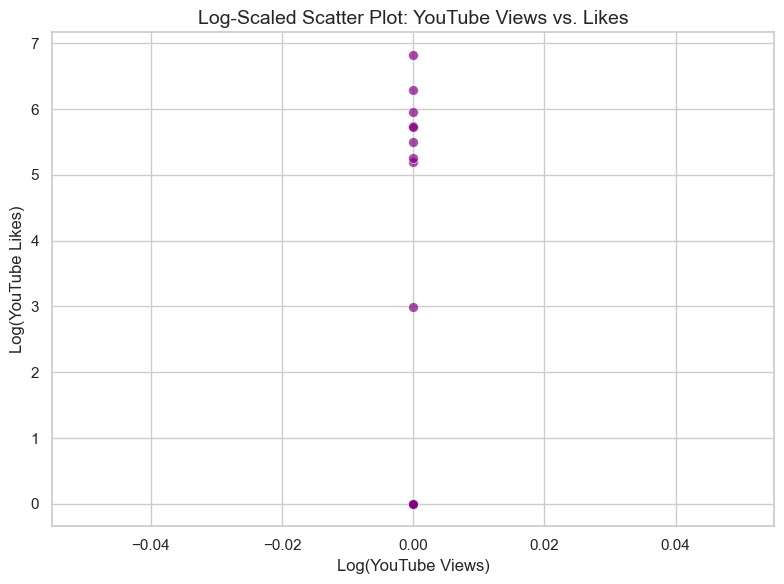

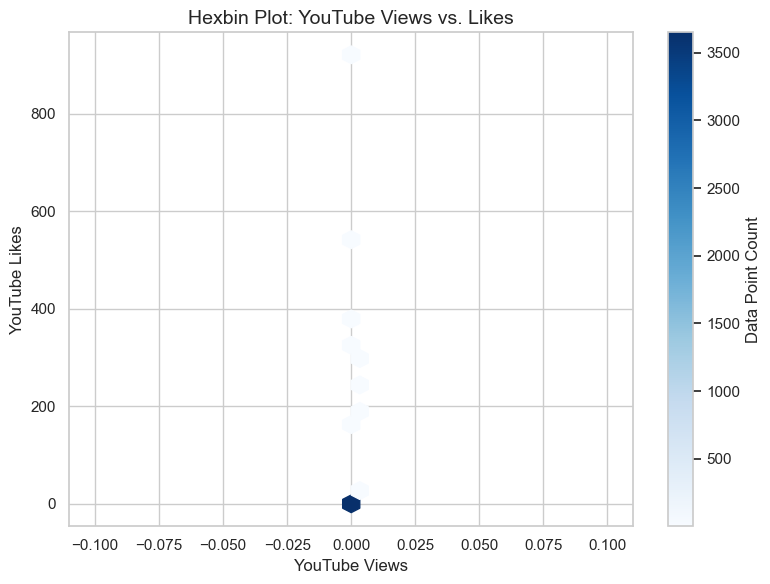

In [40]:
# Filter necessary columns
youtube_views = data_cleaned['YouTube Views']
tiktok_views = data_cleaned['TikTok Views']

# ---- Option 1: Scatter Plot with Regression Line ----
plt.figure(figsize=(8, 6))
sns.scatterplot(x=youtube_views, y=tiktok_views, alpha=0.7, color='blue', s=50)
sns.regplot(x=youtube_views, y=tiktok_views, scatter=False, color='red', line_kws={"linewidth": 1.5})
plt.title('Scatter Plot: YouTube Views vs. Likes', fontsize=14)
plt.xlabel('YouTube Views', fontsize=12)
plt.ylabel('TikTok Views', fontsize=12)
plt.tight_layout()
plt.show()

# ---- Option 2: Jointplot ----
sns.jointplot(
    x='YouTube Views',
    y='TikTok Views',
    data=data_cleaned,
    kind='scatter',
    marginal_kws={'bins': 30, 'fill': True},
    color='green',
    height=8
)
plt.show()

# ---- Option 3: Log-Scaled Scatter Plot ----
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.log1p(youtube_views), y=np.log1p(tiktok_views), alpha=0.7, color='purple', s=50)
sns.regplot(x=np.log1p(youtube_views), y=np.log1p(tiktok_views), scatter=False, color='orange', line_kws={"linewidth": 1.5})
plt.title('Log-Scaled Scatter Plot: YouTube Views vs. Likes', fontsize=14)
plt.xlabel('Log(YouTube Views)', fontsize=12)
plt.ylabel('Log(YouTube Likes)', fontsize=12)
plt.tight_layout()
plt.show()

# ---- Option 4: Hexbin Plot ----
plt.figure(figsize=(8, 6))
plt.hexbin(youtube_views, tiktok_views, gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Data Point Count')
plt.title('Hexbin Plot: YouTube Views vs. Likes', fontsize=14)
plt.xlabel('YouTube Views', fontsize=12)
plt.ylabel('YouTube Likes', fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
# see who are top 10 artists
top_10_df = data_cleaned[data_cleaned['All Time Rank']<11]
top_10_df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,0,0,0,...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,0,0,0,...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,0,0,0,...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,0,0,0,...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,0,0,0,...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...,ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...,BUSHIDO ZHO,5/3/2024,RUB422401359,0,19.4,0,685,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"251,996",NaN,1
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,0,19.4,0,0,0,...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,0,19.4,0,0,0,...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,0,19.4,0,0,0,...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1


In [42]:
top_Artist = top_10_df['Artist'].unique().tolist()

top_artist_hit_count = data_cleaned[data_cleaned['Artist'].isin(top_Artist)]

op_artist_hit_count_crosstab = pd.DataFrame(top_artist_hit_count['Artist'].value_counts()).reset_index()


op_artist_hit_count_crosstab

,Artist,count
0,Bad Bunny,46
1,Drake,45
2,Taylor Swift,40
3,KAROL G,32
4,The Weeknd,29
...,...,...
1417,ZEROBASEONE,1
1418,Hussain Aljassmi,1
1419,NONT TANONT,1
1420,Hugh Jackman,1


C:\Users\Karina\AppData\Local\Temp\ipykernel_33160\2004602258.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


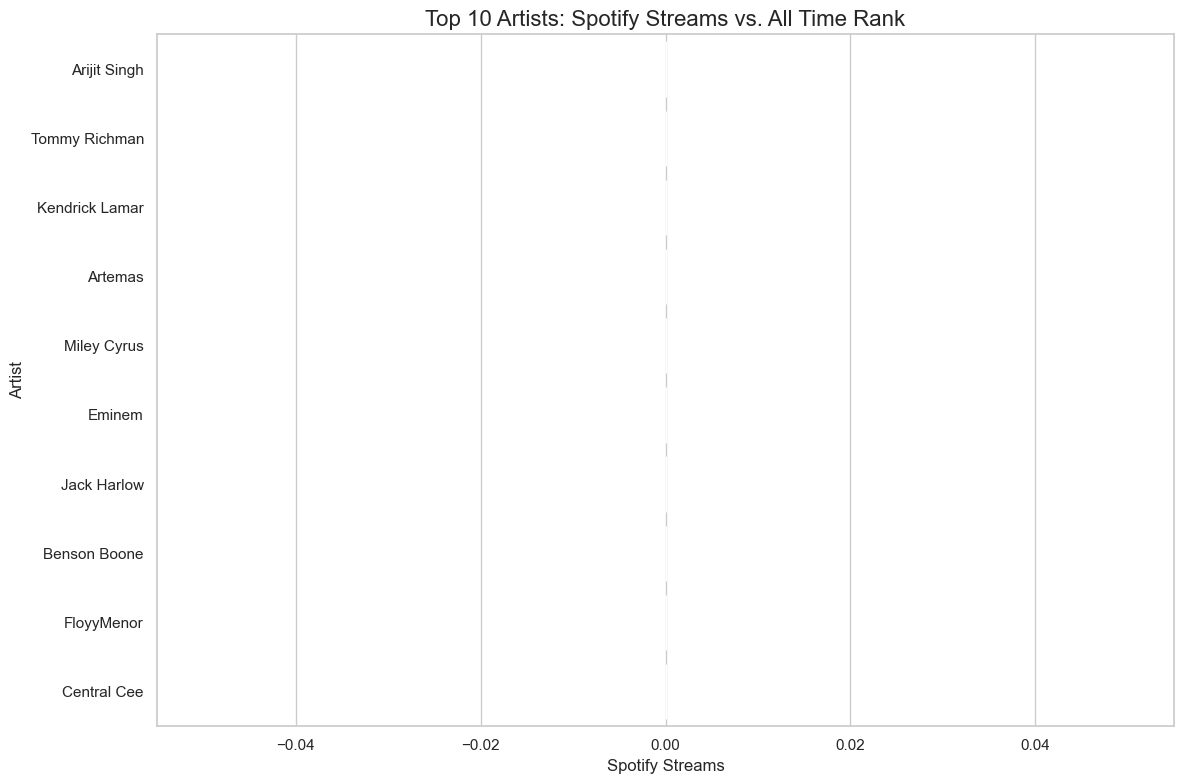

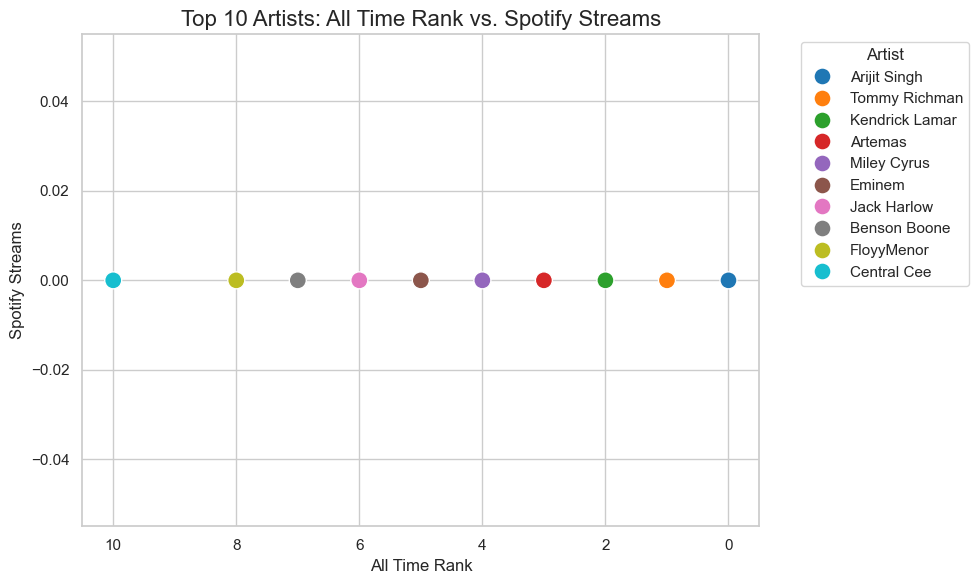

In [43]:
# Ensure All Time Rank is numeric
data_cleaned['All Time Rank'] = pd.to_numeric(data_cleaned['All Time Rank'], errors='coerce')

# Ensure Spotify Streams is numeric (if needed)
data_cleaned['Spotify Streams'] = pd.to_numeric(data_cleaned['Spotify Streams'], errors='coerce')

# Drop rows with missing data in relevant columns
data_cleaned = data_cleaned.dropna(subset=['All Time Rank', 'Spotify Streams', 'Artist'])

# Sort by Spotify Streams to get the top 10 artists
top_10_artists = data_cleaned.sort_values('Spotify Streams', ascending=False).head(10)

# --- Visualization: Bar Plot ---
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Spotify Streams',
    y='Artist',
    data=top_10_artists,
    palette='viridis'
)
plt.title('Top 10 Artists: Spotify Streams vs. All Time Rank', fontsize=16)
plt.xlabel('Spotify Streams', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.tight_layout()
plt.show()

# --- Visualization: Scatter Plot (Rank vs Streams) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='All Time Rank',
    y='Spotify Streams',
    hue='Artist',
    data=top_10_artists,
    palette='tab10',
    s=150
)
plt.gca().invert_xaxis()  # Invert x-axis so rank #1 appears on the left
plt.title('Top 10 Artists: All Time Rank vs. Spotify Streams', fontsize=16)
plt.xlabel('All Time Rank', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
# check if there is a correlation between artist explicity and artist 

palette = sns.color_palette('husl', len(top_level_artist.index))

# Map each artist to a color
color_map = dict(zip(top_level_artist.index, palette))

# Create the scatter plot
plt.figure(figsize=(6, 6))
for artist in top_level_artist.index:
    if artist in color_map:  # Check if the artist is still in the color_map
        artist_data = top_level_artist[top_level_artist.index == artist]
        plt.scatter(artist_data['Total Spotify Streams'], artist_data['Explicit (%)'], 
                    color=color_map[artist], label=artist)

# Add title and labels
plt.title('Spotify Streams vs Explicit Percentage by Artist')
plt.xlabel('Spotify Streams')
plt.ylabel('Explicit (%)')

# Add legend
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

NameError: name 'top_level_artist' is not defined

In [ ]:
# check if there is a correlation between artist explicity and artist 

palette = sns.color_palette('husl', len(top_level_artist.index))

# Map each artist to a color
color_map = dict(zip(top_level_artist.index, palette))

# Create the scatter plot
plt.figure(figsize=(6, 6))
for artist in top_level_artist.index:
    if artist in color_map:  # Check if the artist is still in the color_map
        artist_data = top_level_artist[top_level_artist.index == artist]
        plt.scatter(artist_data['Total Spotify Streams'], artist_data['Explicit (%)'], 
                    color=color_map[artist], label=artist)

# Add title and labels
plt.title('Spotify Streams vs Explicit Percentage by Artist')
plt.xlabel('Spotify Streams')
plt.ylabel('Explicit (%)')

# Add legend
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [ ]:
f'{percent}% explicit'

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Top Streamed Artists and % of Explicit Tracks")

bars = plt.barh(top_level_artist.index, top_level_artist['Total Spotify Streams'], color='skyblue')

# Add text labels for explicit percentages
for bar, percent in zip(bars, top_level_artist['Explicit (%)']):
    plt.text(
        bar.get_width() + 0.02 * bar.get_width(),  # Place the text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,       # Vertically center the text
        f'{percent}% explicit',                  # Text content
        va='center',                             # Vertical alignment
        ha='left'                                # Horizontal alignment
    )

# Add labels and formatting
plt.xlabel('Total Spotify Streams')
plt.ylabel('Artists')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# check if there is a correlation between artist explicity and artist 

palette = sns.color_palette('husl', len(top_level_artist.index))

# Map each artist to a color
color_map = dict(zip(top_level_artist.index, palette))

# Create the scatter plot
plt.figure(figsize=(6, 6))
for artist in top_level_artist.index:
    if artist in color_map:  # Check if the artist is still in the color_map
        artist_data = top_level_artist[top_level_artist.index == artist]
        plt.scatter(artist_data['Total Spotify Streams'], artist_data['Explicit (%)'], 
                    color=color_map[artist], label=artist)

# Add title and labels
plt.title('Spotify Streams vs Explicit Percentage by Artist')
plt.xlabel('Spotify Streams')
plt.ylabel('Explicit (%)')

# Add legend
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()